In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
import matplotlib.pyplot as plt
import geopandas as gpd
import os,re, glob
import pandas as pd


os.chdir("")


uganda = gpd.read_file('uga_admbnda_ubos_20200824_shp/uga_admbnda_adm1_ubos_20200824.shp')
rwanda = gpd.read_file('rwa_adm_2006_nisr_wgs1984_20181002_shp/rwa_adm1_2006_NISR_WGS1984_20181002.shp')
uganda2 = gpd.read_file('uga_admbnda_ubos_20200824_shp/uga_admbnda_adm2_ubos_20200824.shp')
gdf = pd.concat([uganda, rwanda], ignore_index=True)


uf= gpd.read_file("ug-spatial-agg/ug-spatial-agg.shp")
fu=uf[uf["LC"].isin(['NVT'])]
wu=uf[uf["LC"].isin(['WAT'])]

rf= gpd.read_file("rw_spatial-agg/rw-spatial-agg.shp")
fr=rf[rf["LC"].isin(['NVT'])]
wr=rf[rf["LC"].isin(['WAT'])]

b_uganda = uganda.buffer(-0.00001)  
b_rwanda = rwanda.buffer(-0.00001)  

cfu = gpd.clip(fu, b_uganda)
cfr = gpd.clip(fr, b_rwanda)

cwu = gpd.clip(wu, b_uganda)
cwr = gpd.clip(wr, b_rwanda)

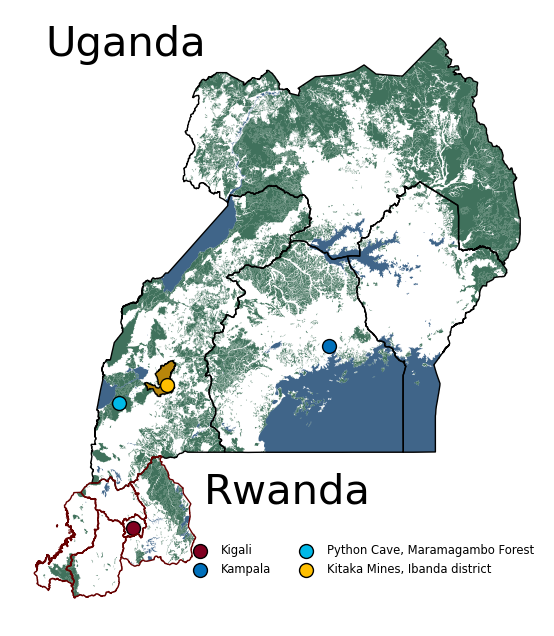

In [10]:
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar  


fig, ax = plt.subplots(figsize=(10, 8))

cfu.plot(ax=ax, color='#004225', alpha=0.75)  

cwu.plot(ax=ax, color='#003262', alpha=0.75)  

cfr.plot(ax=ax, color='#004225', alpha=0.75) 

cwr.plot(ax=ax, color='#003262', alpha=0.75) 



uganda2[uganda2["ADM2_EN"]=="Ibanda"].plot(ax=ax, color='#B8860B', 
                                   edgecolor='black',alpha=1)



plt.scatter(30.1127, -1.9579, color='#800020', marker='o', s=100, label="Kigali", edgecolor="black")

plt.scatter( 32.5825, 0.3476, color='#0070BB', marker='o', s=100, label="Kampala", edgecolor="black")

plt.scatter(29.928282944583803, -0.376370439706982, color='#00B9E8', marker='o', s=100, 
            label="Python Cave, Maramagambo Forest", edgecolor="black")

plt.scatter(30.5357006485996, -0.14423017258582851, color='#FFBF00', marker='o', s=100, 
            label="Kitaka Mines, Ibanda district", edgecolor="black")


uganda.boundary.plot(ax=ax, edgecolor='black', linewidth=1)  

rwanda.boundary.plot(ax=ax, edgecolor='#660000', linewidth=1)  


plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()



handles, labels = ax.get_legend_handles_labels()


new_order=['Kigali', 'Kampala',
 'Python Cave, Maramagambo Forest',
 'Kitaka Mines, Ibanda district']

plt.legend([handles[labels.index(label)] for label in new_order], 
           new_order,bbox_to_anchor=(1, 0.15),
           frameon=False, ncol=2, fontsize='small')

ax.set_axis_off() 


plt.text(29, 4, "Uganda", fontsize=30)
plt.text(31, -1.65, "Rwanda", fontsize=30)


# plt.show()

plt.savefig('Map.png', dpi=500, bbox_inches='tight')  # dpi controls the resolution
